In [1]:
# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read all data from train and test files provided
with open("train.dat", "r") as fh:
    train_lines = fh.readlines()
    
with open("train.labels", "r") as fh:
    train_lables_lines = fh.readlines() 
    
with open("test.dat", "r") as fh:
    test_lines = fh.readlines()  

with open("format.dat", "r") as fh:
    format_lines = fh.readlines() 
    
train_data = [l.split() for l in train_lines] 
test_data = [l.split() for l in test_lines] 
train_lables = [l.split() for l in train_lables_lines]
format_data = [l.split() for l in format_lines]    

In [3]:
# convert string data to float 
train_data = np.float_(train_data)
train_lables = np.float_(train_lables)
test_data = np.float_(test_data)

In [4]:
#Some data insights
print("Number of instances in training data:",len(train_data))
print("Number of instances in test data:",len(test_data))
print("Number of features:", len(train_data[0]))

Number of instances in training data: 21186
Number of instances in test data: 5296
Number of features: 48


In [5]:
#combine train_data and train_labels and create data frame
x_test_df = pd.DataFrame(test_data)
x_df = pd.DataFrame(train_data)
y_df = pd.DataFrame(train_lables)
y_df.rename( columns= {0:'lable'}, inplace=True )
dat1 = pd.concat([x_df, y_df], axis=1)
df = pd.DataFrame(dat1)
features = list(df.columns[0:48])
x = df[features]
y = df['lable']

1.0     10375
2.0      7646
3.0      1743
8.0       850
4.0       294
5.0       198
7.0        52
6.0        18
11.0        7
10.0        3
Name: lable, dtype: int64


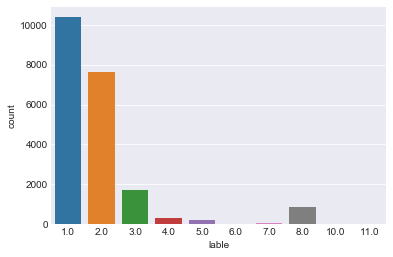

In [6]:
#lets have a look at how many instances do we have for each class
print(df.lable.value_counts())
sns.set_style('darkgrid')
sns.countplot(x ='lable',data=y_df)

** Lets try different models without dimensionality reduction and measure model performance **

In [7]:
#split data into train and validation(test) set:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [9]:
#KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6730862001714888
Accuracy Score:  0.6889553178099433


[0.6729940899031243, 0.6730862001714888, 0.6783881487946367, 0.6827392505105949, 0.681499940525752, 0.6817741294337243, 0.6820002565981548, 0.6805080230388966, 0.6798259192561114, 0.6785691413907171, 0.6747357183176004, 0.6774889705772572, 0.6723660328205454, 0.6747689171569726, 0.6719308473606082]


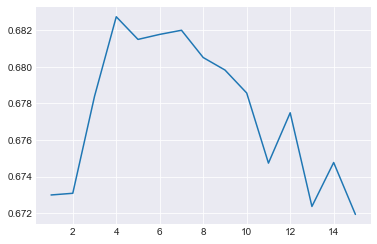

In [10]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)    

In [11]:
#SVM
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5009195723407037
Accuracy Score:  0.5550660792951542


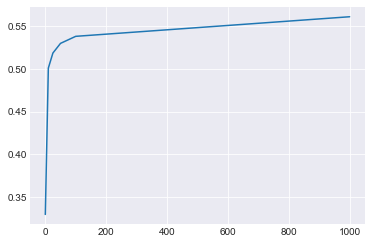

In [12]:
#SVM Fine tunning
cVals = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
f1_scores = []
for c in cVals:
    clf = svm.SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(cVals,f1_scores)

In [13]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5066702568504471
Accuracy Score:  0.5597860289490245


In [14]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.571770743237182
Accuracy Score:  0.5695405915670233


In [10]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6881001166126468
Accuracy Score:  0.7048458149779736


[0.611477711273602, 0.6433835695173098, 0.6512030038061363, 0.6608192528195961, 0.6703124995435177, 0.6747540081933285, 0.6757557853942772, 0.6780063981966247]


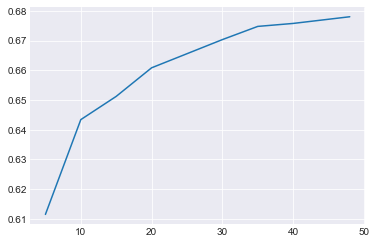

In [16]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,48]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [17]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=150, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.684708269988232
Accuracy Score:  0.7024858401510384


In [50]:
#ExtraTreeClassifier
num_trees = 80
max_features = 48
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.7073178999392998
Accuracy Score:  0.7202643171806168


In [49]:
# AdaBoostClassifier
seed = 7
num_trees = 100
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.32872114610051006
Accuracy Score:  0.49433606041535555


In [53]:
seed = 7
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6223104738896016
Accuracy Score:  0.6422278162366268


In [9]:
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=35)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=50, max_features=35)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.708928480773077
Accuracy Score:  0.723410950283197


In [8]:
#MLPClassifier
net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train,y_train)
pred= net.predict(X_test)

print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6227203792860474
Accuracy Score:  0.6478917558212712


**Results of classifiers**
    - KNearest Neighbour  : 0.6827
    - Logistic Regression : 0.5055
    - SVM                 : 0.5555
    - Decision Tree       : 0.5717
    - Random Forest Classifier : 0.6820
    - MLP Classifier      : 0.6227
    - Ensemble 
        - ExtraTreesClassifier: 0.7019
        - AdaBoostClassifier:   0.3287    
        - GradientBoostingClassifier: 0.6223
        - VotingClassifier:  0.7077

  # Now lets apply Dimensionality Reduction 
  ## We will use PCA and SVD 
  ### Considered Top 4 performing classifiers KNN, Random Forest , ExtraTreeClassifier, and Voting Classifier

### PCA
#### lets plot components vs variance

Text(0,0.5,'explained_variance_ratio_')

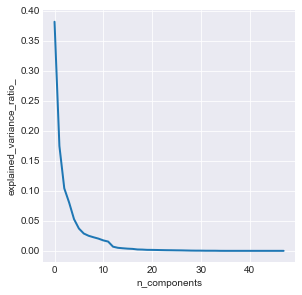

In [55]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)
plt.figure(1, figsize=(5,5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

** Above graph clearly illustrates that with only decrease of 0.05% of variance we can reduce components to 5 from 48 , Lets try to apply PCA with 5 Components ** 

In [56]:
# Taking 30 PCA Components
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 

In [57]:
#KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_pca,y_train)
pred = knn.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6022352011147469
Accuracy Score:  0.6266519823788547


[0.5921729912118898, 0.6022352011147469, 0.6146970139293378, 0.6123597655902561, 0.613960379247996, 0.6108997076022266, 0.6181550627884653, 0.6146867638594699, 0.6119953863494269, 0.6133395346255334, 0.6117154604910202, 0.6084689394596678, 0.6118761073544893, 0.6093625053925541, 0.6090531966065424]


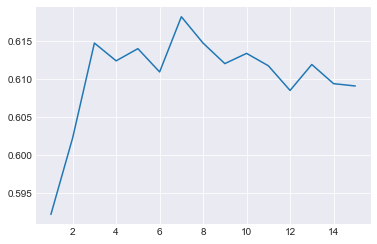

In [58]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    pred = knn.predict(X_test_pca)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores) 

In [59]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_pca,y_train)
pred = rf_classifier.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6239527961540182
Accuracy Score:  0.6420704845814978


In [61]:
#ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_features=5)
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6267453023709627
Accuracy Score:  0.6415984896161108


In [63]:
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 
#Version 13 imporvement
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=5)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=5)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_pca, y_train)
pred = ensemble.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6298416941056721
Accuracy Score:  0.6467904342353682


In [64]:
#MLPClassifier
net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train_pca,y_train)
pred= net.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5735196533750669
Accuracy Score:  0.5995909376966646


 ** As we can see the results varies a lot(decreases) by considering only 5 components, lets check results with different number of components **

[0.6181550627884653, 0.6697780799734182, 0.6764826559433379, 0.6792128186080886, 0.681392858615217, 0.6816486925410071, 0.6820002565981548, 0.6820002565981548, 0.6820002565981548]


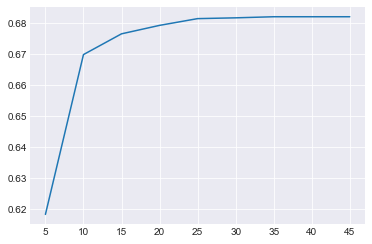

In [65]:
components = [5,10,15,20,25,30,35,40,45]
f1_scores = [] 
for c in components:
    pca = PCA(n_components=c)  
    X_train_pca = pca.fit_transform(X_train)  
    X_test_pca = pca.transform(X_test) 
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train_pca,y_train)
    pred = knn.predict(X_test_pca)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(components,f1_scores)    
print(f1_scores) 

 ** As we can see with 25 components our model performs equivalent to using all features. so, lets try SVD with taking 25 compoents into consideration**

## SVD

In [11]:
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train,y_train)
X_test_svd = svd.transform(X_test)

In [12]:
#KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_svd,y_train)
pred = knn.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6805549089854743
Accuracy Score:  0.6876966645689113


[0.6717955041836813, 0.6731325096604828, 0.6771769141780627, 0.6823112900855371, 0.6822173633623043, 0.6794429267662813, 0.6805549089854743, 0.6809370578513793, 0.6806604125552069, 0.6795963374285988, 0.6747728501049853, 0.6783404138938011, 0.6702498369214388, 0.6741576897271259, 0.6703673399811629]


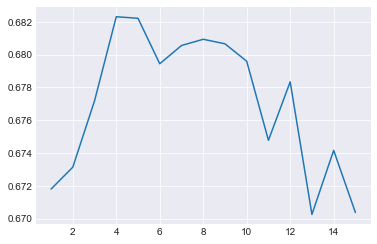

In [70]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_svd,y_train)
    pred = knn.predict(X_test_svd)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)

In [71]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_svd,y_train)
pred = rf_classifier.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6773953361801541
Accuracy Score:  0.7009125235997483


In [74]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
model.fit(X_train_svd, y_train)
pred = model.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6963976230367195
Accuracy Score:  0.7134990560100692


In [86]:
#MLPClassifier
net = MLPClassifier(random_state=2,hidden_layer_sizes=(500,350,400,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train_svd,y_train)
pred= net.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6916582055592061
Accuracy Score:  0.6922592825676526


In [75]:
# Try with Different Models VOTING CLASSIFIER
#KNN + RandomForest + ExtraTree
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=20,random_state=7)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_svd, y_train)
pred = ensemble.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6979745950765622
Accuracy Score:  0.7161736941472624


In [77]:
# Try with Different Models VOTING CLASSIFIER
from sklearn.ensemble import VotingClassifier
# create the sub models
# KNN + MLP + ExtraTree
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_svd, y_train)
pred = ensemble.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.708878792016308
Accuracy Score:  0.7232536186280679


** F1 SCORE of 0.7089 is the highest f1 score we got till now ** 

[0.6642463969488033, 0.6836513000700775, 0.6890759936319961, 0.6949480982580597, 0.6963976230367195, 0.697717588731159, 0.7019133523663137, 0.6985710548328616, 0.6996288619909623, 0.6993244297523629]


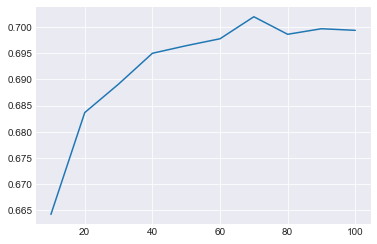

In [79]:
# LETS TRY TO IMPROVE EXTRATREECLASSIFIER
#F1 without DR 0.7015
#F1 with PCA (20) 0.6964
#F1 without SVD (20) 0.6979
# lets work with pca
estimators = [10,20,30,40,50,60,70,80,90,100]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e, max_features=20,random_state = 7)
    model.fit(X_train_svd, y_train)
    pred = model.predict(X_test_svd)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [80]:
# Try with Different Models VOTING CLASSIFIER
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=70, max_features=20,random_state=7)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_svd, y_train)
pred = ensemble.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.7120980174533819
Accuracy Score:  0.7262429200755192


### After Dimensionality reduction technique lets explore Feature Selection techniques and choose the best result

#### 1) SelectKBest using chi2 solver

In [92]:
X_test_df = pd.DataFrame(test_data)
x_df = pd.DataFrame(train_data)
y_df = pd.DataFrame(train_lables)
y_df.rename( columns= {0:'lable'}, inplace=True )
dat1 = pd.concat([x_df, y_df], axis=1)
df = pd.DataFrame(dat1)
features = list(df.columns[0:48])
X = df[features]
y = df['lable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

select_feature = SelectKBest(chi2, k=20).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [19.80092045 30.73694266  5.82742214  5.8248272  32.35374911 27.41760379
 12.89638723 46.81459968 18.91556947 27.18301979  6.80930772  5.15988508
 30.94849106 28.09648789 13.45837781 47.06431565 19.74465891 25.50129836
  8.17486474  5.49187213 37.69974436 26.0243419  13.46637315 46.4468479
 19.74465891 25.50129836  8.17486474  5.49187213 37.69974436 26.0243419
 13.46637315 46.4468479   0.35212558  0.66279791  0.32590762  0.13246859
  0.79641321  0.10220172  0.13214078  0.1461168   8.66599112 13.39278736
 10.14693052  7.29790294  5.61388356  5.59872855  6.10688102  2.79479199]
Feature list: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype='object')


In [93]:
select_feature.scores_.argsort()

array([37, 38, 35, 39, 34, 32, 33, 36, 47, 11, 19, 27, 45, 44,  3,  2, 46,
       10, 43, 18, 26, 40, 42,  6, 41, 14, 22, 30,  8, 16, 24,  0, 25, 17,
       29, 21,  9,  5, 13,  1, 12,  4, 28, 20, 31, 23,  7, 15])

In [120]:
#lets select top 25 features
df1 = df[[37, 38, 35, 39, 34, 32, 33, 36, 47, 11, 19, 27, 45, 44,  3,  2, 46,
       10, 43, 18, 26, 40, 42,  6, 41, 'lable']]
X_new = df1[[37, 38, 35, 39, 34, 32, 33, 36, 47, 11, 19, 27, 45, 44,  3,  2, 46,
       10, 43, 18, 26, 40, 42,  6, 41]]
y_new = df1['lable']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.30, random_state=42)

In [121]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_new,y_train_new)
pred = knn.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.5908938120485011
Accuracy Score:  0.6039962240402769


[0.5606346954777811, 0.5721116296823867, 0.5805386197050472, 0.5902675662683752, 0.5861419521443506, 0.5925836963441679, 0.5908938120485011, 0.5858614671636412, 0.5826661713085042, 0.5866265460885287, 0.5843724943993257, 0.5853890144878711, 0.5827748745933866, 0.58188097005469, 0.5842491854810314]


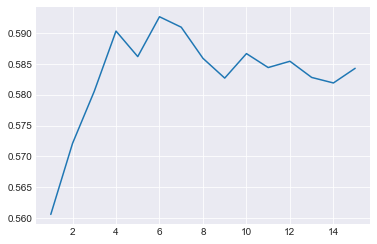

In [122]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_new,y_train_new)
    pred = knn.predict(X_test_new)
    f1_scores.append(f1_score(y_test_new,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)

#### The results are very poor than dimensionality reduction algorithm for SelectKBest

### 2) RFE (Recursive feature elimination)

In [117]:
X_test_df = pd.DataFrame(test_data)
x_df = pd.DataFrame(train_data)
y_df = pd.DataFrame(train_lables)
y_df.rename( columns= {0:'lable'}, inplace=True )
dat1 = pd.concat([x_df, y_df], axis=1)
df = pd.DataFrame(dat1)
features = list(df.columns[0:48])
X = df[features]
y = df['lable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [123]:
#using RFE for feature selection
#Reference: http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
clf = RandomForestClassifier()      
rfe = RFE(estimator=clf, n_features_to_select=25, step=1)
rfe = rfe.fit(X_train,y_train)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', X_train.columns[rfe.support_])


Optimal number of features : 25
Best features : Index([ 0,  1,  4,  5,  6,  8, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 24, 28,
       29, 31, 32, 40, 41, 43, 47],
      dtype='object')


In [124]:
df1 = df[[ 0,  1,  4,  5,  6,  8, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 24, 28,
       29, 31, 32, 40, 41, 43, 47, 'lable']]
X_new = df1[[ 0,  1,  4,  5,  6,  8, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 24, 28,
       29, 31, 32, 40, 41, 43, 47]]
y_new = df1['lable']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.30, random_state=42)

[0.6654664287368636, 0.6652768299794882, 0.6811611833589656, 0.6868150247394064, 0.688895696470333, 0.6876471695313738, 0.6846383435117976, 0.6816697155058253, 0.6835510903976979, 0.6788679606145245]


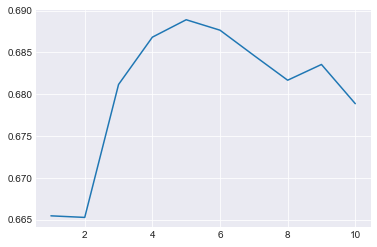

In [125]:
kVals = [1,2,3,4,5,6,7,8,9,10]
f1_scores = []
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_new,y_train_new)
    pred = knn.predict(X_test_new)
    f1_scores.append(metrics.f1_score(y_test_new,pred, average='weighted'))

plt.plot(kVals,f1_scores)
print(f1_scores)

In [132]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=20,random_state = 7)
rf_classifier.fit(X_train_new,y_train_new)
pred = rf_classifier.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6851063831580643
Accuracy Score:  0.7016991818753934


In [128]:
model = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state = 7)
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.7168330149956892
Accuracy Score:  0.7286028949024543


In [130]:
#MLPClassifier
net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train_new,y_train_new)
pred= net.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.6476506520549539
Accuracy Score:  0.658275645059786


In [133]:
# Try with Different Models VOTING CLASSIFIER
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=20,random_state = 7)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state = 7)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train_new)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.7021055363383705
Accuracy Score:  0.7153870358716173


### 3)RFECV  (Recursive feature elimination with Cross Validation)

In [6]:
# Using RFECV for feature selection
X_test_df = pd.DataFrame(test_data)
x_df = pd.DataFrame(train_data)
y_df = pd.DataFrame(train_lables)
y_df.rename( columns= {0:'lable'}, inplace=True )
dat1 = pd.concat([x_df, y_df], axis=1)
df = pd.DataFrame(dat1)
features = list(df.columns[0:48])
X = df[features]
y = df['lable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 29
Best features : Index([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 12, 13, 14, 16, 17, 18, 20, 21,
       24, 28, 29, 30, 31, 32, 40, 41, 42, 43, 47],
      dtype='object')


In [14]:
df1 = df[[0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 12, 13, 14, 16, 17, 18, 20, 21,
       24, 28, 29, 30, 31, 32, 40, 41, 42, 43, 47, 'lable']]
X_new = df1[[0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 12, 13, 14, 16, 17, 18, 20, 21,
       24, 28, 29, 30, 31, 32, 40, 41, 42, 43, 47]]
y_new = df1['lable']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.30, random_state=42)

In [15]:
#MLPClassifier
net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train_new,y_train_new)
pred= net.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.6475585162024573
Accuracy Score:  0.6697608558842039


[0.6747048180622278, 0.67423776782941, 0.6835521307078434, 0.6843773886230046, 0.6896286045556517, 0.687551756389838, 0.6864112643904843, 0.6848312231185678, 0.6845176626159184, 0.6846092306292757]


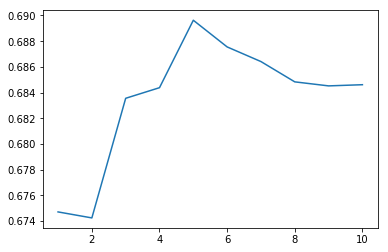

In [9]:
kVals = [1,2,3,4,5,6,7,8,9,10]
f1_scores = []
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_new,y_train_new)
    pred = knn.predict(X_test_new)
    f1_scores.append(metrics.f1_score(y_test_new,pred, average='weighted'))

plt.plot(kVals,f1_scores)
print(f1_scores)

In [152]:
#RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200,max_features=5,random_state = 7)
rf_classifier.fit(X_train_new,y_train_new)
pred = rf_classifier.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.6933796977709942
Accuracy Score:  0.7092511013215859


In [157]:
#ExtraTreeClassfier
model = ExtraTreesClassifier(n_estimators=400, max_features=5,random_state=7)
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.7187070582418272
Accuracy Score:  0.7312775330396476


In [155]:
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=200,max_features = 5 ,random_state=7)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=400, max_features=5,random_state=55)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_new, y_train_new)
pred = ensemble.predict(X_test_new)
print("F1 Score: ", metrics.f1_score(y_test_new,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test_new,pred))

F1 Score:  0.7140579633344308
Accuracy Score:  0.7268722466960352


** At this point we can figure out that ExtraTreeClassifier has best f1_score so far **

### Lets build best model on actual trian_data and generate output file 

In [7]:
X_test_df = pd.DataFrame(test_data)
x_df = pd.DataFrame(train_data)
y_df = pd.DataFrame(train_lables)
y_df.rename( columns= {0:'lable'}, inplace=True )
dat1 = pd.concat([x_df, y_df], axis=1)
df = pd.DataFrame(dat1)
features = list(df.columns[0:48])
X = df[features]
y = df['lable']

In [8]:
# following parameters are taken from RFECV it has 29 best features and ExtraTree classifier is 
# considering max 5 features
df1 = df[[ 0,  1,  2,  3,  4,  5,  6,  9, 10, 13, 14, 15, 20, 21, 22, 24, 25, 26,
          28, 29, 30, 31, 32, 40, 41, 42, 44, 46, 47, 'lable']]
X_new = df1[[ 0,  1,  2,  3,  4,  5,  6,  9, 10, 13, 14, 15, 20, 21, 22, 24, 25, 26,
       28, 29, 30, 31, 32, 40, 41, 42, 44, 46, 47]]
y_new = df1['lable']
X_test_df1 = X_test_df[[0,  1,  2,  3,  4,  5,  6,  9, 10, 13, 14, 15, 20, 21, 22, 24, 25, 26,
       28, 29, 30, 31, 32, 40, 41, 42, 44, 46, 47]]

In [9]:
model = ExtraTreesClassifier(n_estimators=400, max_features=5,random_state=74)
model.fit(X_new,y_new)
pred = model.predict(X_test_df1)
f= open("Prediction25.dat","w+")
for val in pred:
    f.write(str(int(val)) + "\n")
f.close()